## Zak Phase calculation for graphene nanoribbons

Let's make graphene and try to compute the Zak phase for different cell size and shape

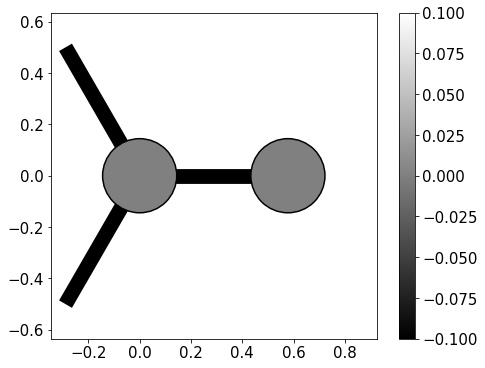

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.


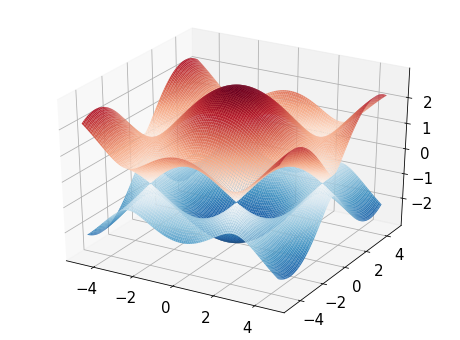

In [1]:
%run matplotlib_setup.ipy

from types import SimpleNamespace

from ipywidgets import interact
import matplotlib
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import numpy as np
import scipy.linalg as la 
from math import floor

import kwant
from kwant.wraparound import wraparound, plot_2d_bands


def momentum_to_lattice(k):
    """Transform momentum to the basis of reciprocal lattice vectors.
    
    See https://en.wikipedia.org/wiki/Reciprocal_lattice#Generalization_of_a_dual_lattice
    """
    B = np.array(graphene.prim_vecs).T
    A = B.dot(np.linalg.inv(B.T.dot(B)))
    return np.linalg.solve(A, k)


def dispersion_2D(syst, args=None, lim=1.5*np.pi, num_points=200):
    """A simple plot of 2D band structure."""
    if args is None:
        args = []
    momenta = np.linspace(-lim, lim, num_points)
    energies = []
    for kx in momenta:
        for ky in momenta:
            lattice_k = momentum_to_lattice([kx, ky])
            h = syst.hamiltonian_submatrix(args=(list(args) + list(lattice_k)))
            energies.append(np.linalg.eigvalsh(h))
    
    energies = np.array(energies).reshape(num_points, num_points, -1)
    emin, emax = np.min(energies), np.max(energies)
    kx, ky = np.meshgrid(momenta, momenta)
    fig = pyplot.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')
    for band in range(energies.shape[-1]):
        axes.plot_surface(kx, ky, energies[:, :, band], cstride=2, rstride=2,
                          cmap=matplotlib.cm.RdBu_r, vmin=emin, vmax=emax,
                          linewidth=0.1)
        
#Some helper functions to make the schematic look neat
def family_color(site): 
    #if site.family == a or site.family==c: 
    #    return 0
    #else: 
    return 0
    
def hopping_lw(site1,site2): 
    return 0.1 if A in [site1.family,site2.family] else 0.05

graphene = kwant.lattice.general([[np.sqrt(3)/2,1/2],[np.sqrt(3)/2,-1/2]],  #Lattice vectors 
                                  [[0,0],[1/np.sqrt(3),0]]) # Co-ordinates
a,b = graphene.sublattices

bulk_graphene = kwant.Builder(kwant.TranslationalSymmetry(*graphene.prim_vecs))
bulk_graphene[graphene.shape((lambda pos: True), (0, 0))] = 0
bulk_graphene[graphene.neighbors(1)] = 1
kwant.plot(bulk_graphene,site_color=family_color,site_lw=0.01)
dispersion_2D(wraparound(bulk_graphene).finalized())

In [2]:
Zigzag = kwant.lattice.general([[1,0],[0,np.sqrt(3)/3]], #Lattice vectors
                                     [[1/6,0],[2/6,np.sqrt(3)/2],[4/6,np.sqrt(3)/2],[5/6,0]]) # Coordinates

a,b,c,d = Zigzag.sublattices

def get_width(N=7): 
    if N < 2: 
        raise("N cannot be less than 2")
    else:
        return N/2*Zigzag.prim_vecs[1][1]+0.01

    
def make_1D_zigzag(N=7):
    #syst = kwant.Builder(kwant.TranslationalSymmetry(Zigzag.prim_vecs[0]))
    syst = kwant.Builder(kwant.TranslationalSymmetry([1,0]))
    syst[Zigzag.shape((lambda pos: pos[1] >0 and pos[1] <= get_width(N)),(0,0))] = 0
    syst[Zigzag.neighbors()] = -1
    return syst
def terminate_edges(syst,lattice,lat_vec): 
    sites = list(syst.sites())
    #print(sites)
    nsites = len(sites)
    pos = np.array([site.pos for site in sites])
    tags = [site.tag for site in sites]
    family = [site.family for site in sites]
    ymax = np.max(pos[:,1])
    ymin = np.min(pos[:,1])
    edge_index = []
    for i,p in enumerate(pos): 
        if abs(p[1] - ymax) < 1.e-2 or abs(p[1]-ymin) < 1.e-2: 
            edge_index.append(i)
    nedges = len(edge_index)
    #print(edge_index)
    edge_hoping_pairs = []
    for i in range(nedges): 
        site1 = sites[edge_index[i]]
        #print(site1.pos)
        neigh_sites = syst.neighbors(site1)
        for site2 in neigh_sites: 
            if abs(site2.pos[1] - ymax) < 1.0e-2  or abs(site2.pos[1]-ymin)< 1.0e-2:
                hop_pair = [site1.tag,site2.tag]
                pair_seen = hop_pair in edge_hoping_pairs
                if not pair_seen:
                    syst[site1,site2] = -1 - 0.1
                    edge_hoping_pairs.append([site1.tag,site2.tag])
                    #print(site1.pos)
                    #print(site2.pos)
    #print(edge_hoping_pairs)
    #print(edge_index)           
    return syst


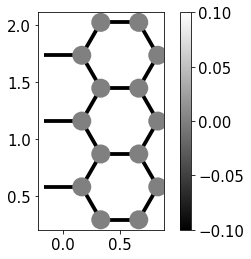

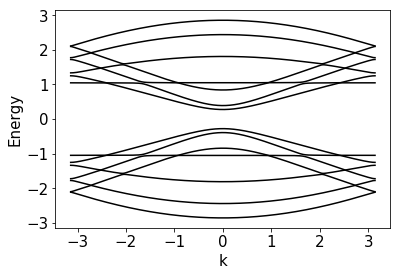

In [4]:
Zigzag_1d = make_1D_zigzag(N=7)
Zigzag_1d = terminate_edges(Zigzag_1d,Zigzag,get_width(7))
kwant.plot(Zigzag_1d,site_color=family_color);
Zigzag_1d = Zigzag_1d.finalized()
kwant.plotter.bands(Zigzag_1d,momenta=100001);

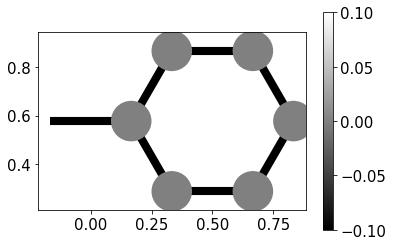

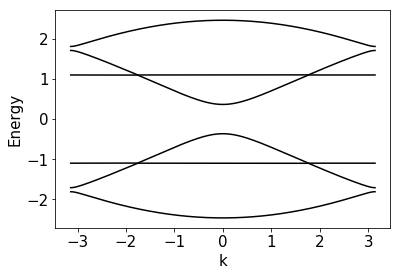


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:50:36,647                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x10b28a378>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

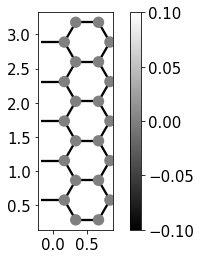

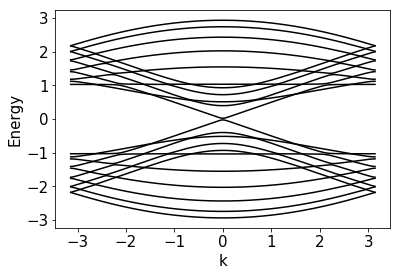


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:50:46,479                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x11cb09c80>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

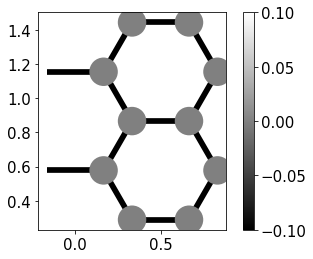

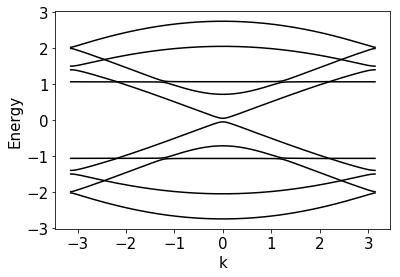


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:50:49,868                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x10b28a378>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

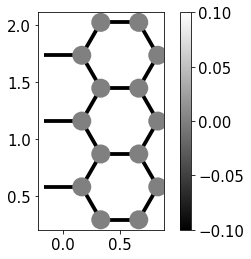

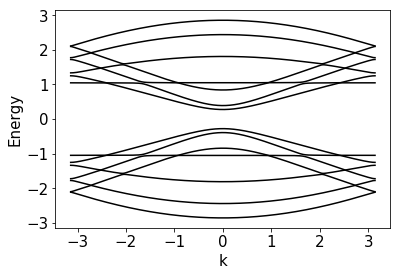


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:50:53,925                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x11cb09c80>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

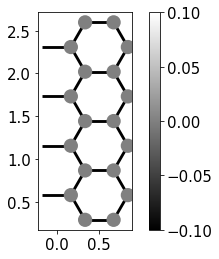

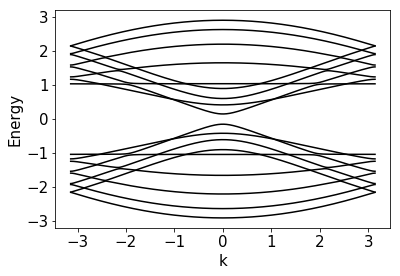


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:50:58,721                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x10b279ae8>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

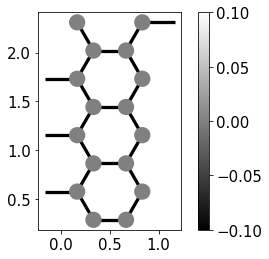

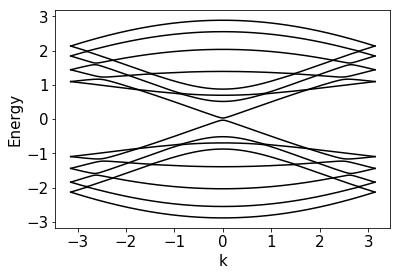


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:51:04,683                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x11cb09c80>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

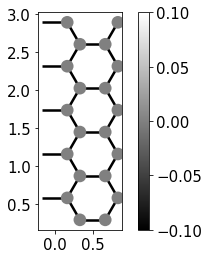

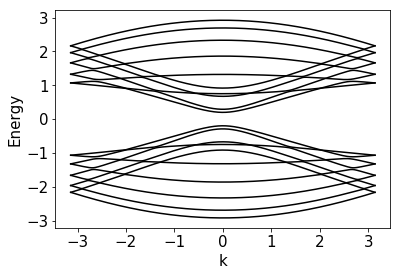


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:51:09,716                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x10b279ae8>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

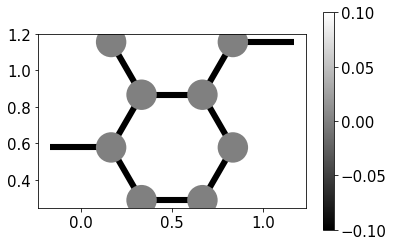

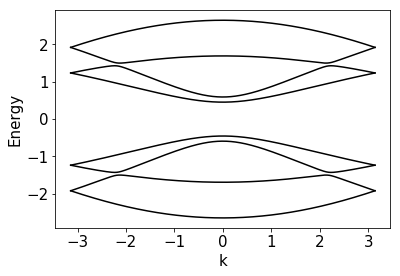


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:51:12,862                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x11ce6cf28>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

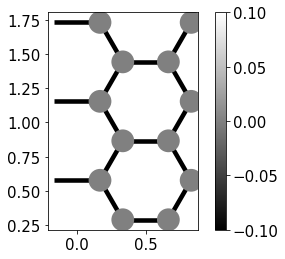

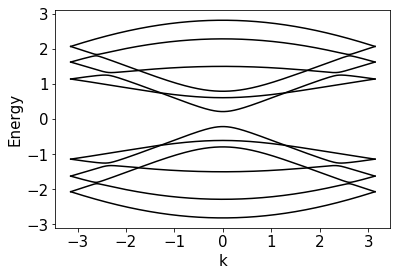


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:51:16,452                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x10b279ae8>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

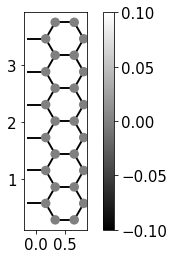

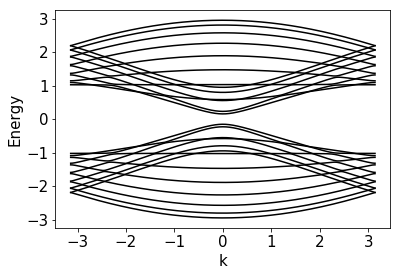


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-26 13:51:22,964                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(3, 501, 2)                                 |
|        line:        <function <lambda> at 0x11db37f28>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

In [5]:
N_list =[3,11,5,7,9,8,10,4,6,13]#,15,23,17,19,21,12,20,22,14,16,18]
#N_list =[11]
pol_N={}
wcc_N={}
import z2pack
from Z2_compute import zak_bands as zak_bands_z2
for N in N_list:
    # Making a Zigzag lead
    Zigzag_1d = make_1D_zigzag(N=N)
    #site_value = Zigzag_1d.site_value_pairs()
    Zigzag_1d = terminate_edges(Zigzag_1d,Zigzag,get_width(N))
    #for site in list(Zigzag_1d.sites()):
        #print(site_value(site))
     #   if site.family == a or site.family == c: 
        #    Zigzag_1d[site.family(site.tag[0],site.tag[1])] = 0.1
      #  else:
       #     Zigzag_1d[site.family(site.tag[0],site.tag[1])] = -0.1
    #Zigzag_1d[Zigzag.neighbors(2)] = 0.005
    kwant.plot(Zigzag_1d,site_color=family_color);
    Zigzag_1d = Zigzag_1d.finalized()
    kwant.plotter.bands(Zigzag_1d,momenta=100001);

    act_pos = np.array([Zigzag_1d.pos(i) for i in range(2*N)])
    a1,a2 = [Zigzag.prim_vecs[0][0],get_width(N=N)]
    red_pos = np.zeros(np.shape(act_pos))
    red_pos[:,0] = act_pos[:,0]/a1
    red_pos[:,1] = act_pos[:,1]/a2


    ham_k=zak_bands_z2(Zigzag_1d,momenta=100001,dim=2)
    z2_system = z2pack.hm.System(ham_k,dim=2,#pos=red_pos,
                                 convention=1)
    pol_sum = 0
    for n in range(0,1):
        result1 = z2pack.line.run(system=z2_system, 
                                 line=lambda t1: [t1,0],#,n/(N+1)])#,
                                 pos_tol=1e-3,iterator=range(3,501,2));
    #np.exp(-1*2*np.pi*np.sum(np.log(np.diagonal(result.wilson))))
    #result.pol
        #result12 = z2pack.line.run(system=z2_system, 
        #                         line=lambda t1: [t1,-n/(N+1)],
        #                         pos_tol=1e-2)
        pol_sum += result1.pol
        #pol_sum += result2.pol
        
    
    #pol_N[N] = np.sign(np.exp(-1j*2*np.pi*(pol_sum % 1)))
    pol_N[N] = pol_sum % 1
    wcc_N[N] = result1.wcc

In [14]:
pol_N

{3: 4.440892098500626e-16,
 11: 0.9999999999999787,
 5: 0.49999999999997824,
 7: 0.5000000000000009,
 9: 0.5000000000000009,
 8: 8.881784197001252e-15,
 10: 0.9999999999999982,
 4: 0.4999999999999971,
 6: 0.5000000000000027,
 13: 0.9999999999999964}

In [101]:
bands = kwant.physics.Bands(Zigzag_1d)
energies = bands(0) 
energies

array([-2.73372472, -2.0050125 , -1.00666662, -0.73039133, -0.0049875 ,
        0.0049875 ,  0.73039133,  1.00666662,  2.0050125 ,  2.73372472])

# Zigzag'

In [105]:
Zigzag_dash = kwant.lattice.general([[1,0],[0,np.sqrt(3)/3]], #Lattice vectors
                                     [[1/6,0],[2/6,-np.sqrt(3)/2],[4/6,-np.sqrt(3)/2],[5/6,0]]) # Coordinates

def get_width_dash(N=7): 
    #if N < 2: 
        #raise("N cannot be less than 2")
    #else:
    return N/2*Zigzag_dash.prim_vecs[1][1]

def make_1D_zigzag_dash(N=7):
    syst = kwant.Builder(kwant.TranslationalSymmetry(Zigzag_dash.prim_vecs[0]))
    syst[Zigzag_dash.shape((lambda pos: pos[1] >-1*get_width_dash(1) and pos[1] <= get_width_dash(N-1)),(0,0))] = 0
    syst[Zigzag_dash.neighbors()] = -1
    return syst

[0.16666666666666666 0.0]
[-0.16666666666666663 0.0]
[0.8333333333333334 0.0]
[1.1666666666666667 0.0]
[0.6666666666666666 3.7527767497325675]
[0.3333333333333333 3.7527767497325675]
[[array([0, 0]), array([-1, 0])], [array([0, 0]), array([1, 0])], [array([0, 8]), array([0, 8])]]
[0, 1, 26, 27]


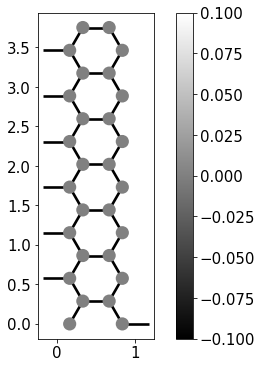

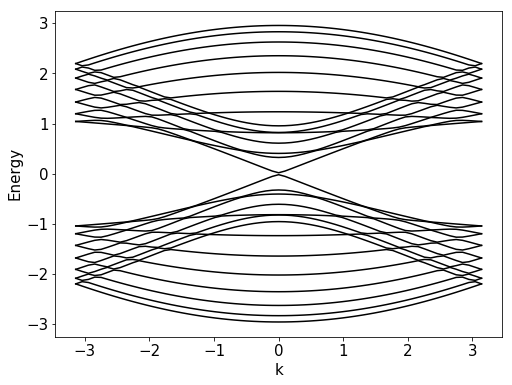


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:02:46,597                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(200, 500, 2)                               |
|        line:        <function <lambda> at 0x11c75f9d8>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.001                                            |
|        save_file:   None                        

In [121]:
#N_list =[3,11,5,7,9,8,10,4,6,13,15,23,17,19,21,12,20,22,14,16,18]
N_list =[14]
pol_N={}
import z2pack
from Z2_compute import zak_bands as zak_bands_z2
for N in N_list:
    # Making a Zigzag lead
    Zigzag_1d_dash = make_1D_zigzag_dash(N=N) 
    Zigzag_1d_dash = terminate_edges(Zigzag_1d_dash,Zigzag,get_width(N))
    #Zigzag_1d_dash[Zigzag.neighbors(2)] = 0.001
    kwant.plot(Zigzag_1d_dash,site_color=family_color);
    Zigzag_1d_dash = Zigzag_1d_dash.finalized()
    kwant.plotter.bands(Zigzag_1d_dash);

    #act_pos = np.array([Zigzag_1d_dash.pos(i) for i in range(2*N)])
    #a1,a2 = [Zigzag_dash.prim_vecs[0][0],get_width(N=N)]
    #red_pos = np.zeros(np.shape(act_pos))
    #red_pos[:,0] = act_pos[:,0]/a1
    #red_pos[:,1] = act_pos[:,1]/a2


    ham_k=zak_bands_z2(Zigzag_1d_dash,momenta=1001,dim=1)
    z2_system = z2pack.hm.System(ham_k,dim=1,#pos=red_pos,
                                 convention=2)
    pol_sum = 0
    for n in range(0,1):
        result1 = z2pack.line.run(system=z2_system, 
                                 line=lambda t1: [t1],#,n/(N+1)])#,
                                 pos_tol=1e-3,iterator=range(200,500,2));
    #np.exp(-1*2*np.pi*np.sum(np.log(np.diagonal(result.wilson))))
    #result.pol
        #result12 = z2pack.line.run(system=z2_system, 
        #                         line=lambda t1: [t1,-n/(N+1)],
        #                         pos_tol=1e-2)
        pol_sum += result1.pol
        #pol_sum += result2.pol
        
    
    pol_N[N] = pol_sum % 1
    z2 = np.sign(np.exp(1j*2*np.pi*pol_N[N]))

In [122]:
pol_N

{14: 0.4999999999999991}

## Bearded

In [123]:
Bearded = kwant.lattice.general([[1,0],[0,np.sqrt(3)/3]], #Lattice vectors
                                     [[0.5/6,np.sqrt(3)/2],[2.5/6,np.sqrt(3)/2],[3.5/6,0],[5.5/6,0]]) # Coordinates

def get_width(N=7): 
    if N < 2: 
        raise("N cannot be less than 2")
    else:
        return N/2*Zigzag.prim_vecs[1][1]+0.01

def make_1D_bearded(N=7):
    syst = kwant.Builder(kwant.TranslationalSymmetry(Bearded.prim_vecs[0]))
    syst[Bearded.shape((lambda pos: pos[1] >0 and pos[1] <= get_width(N)),(0,0))] = 0
    syst[Bearded.neighbors()] = -1
    return syst

[0.08333333333333333 0.28867513459481287]
[0.4166666666666667 0.28867513459481287]
[0.9166666666666666 1.1547005383792515]
[0.5833333333333334 1.1547005383792515]
[[array([0, -1]), array([0, -1])], [array([0, 2]), array([0, 2])]]
[2, 3, 6, 7]


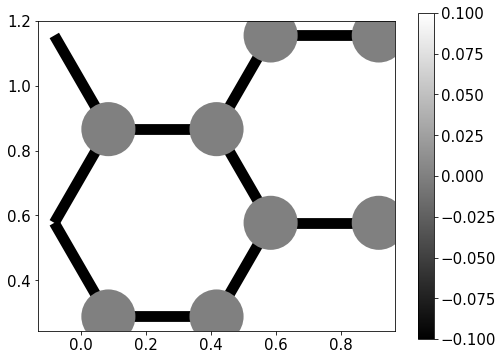

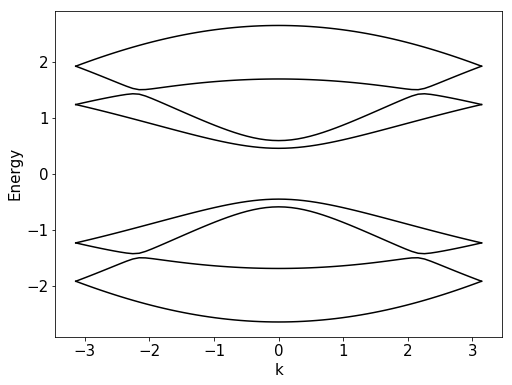


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:36,841                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11832f7b8>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

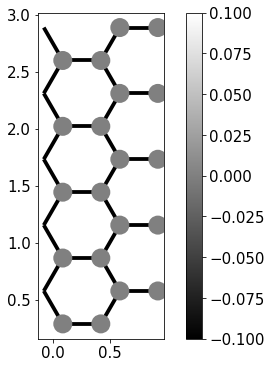

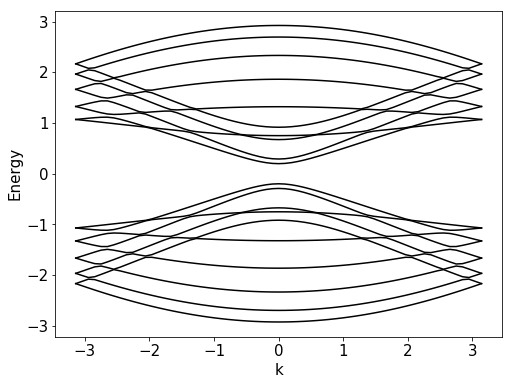


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:37,207                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11832f378>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

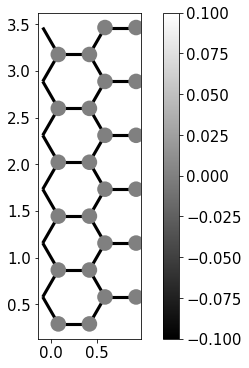

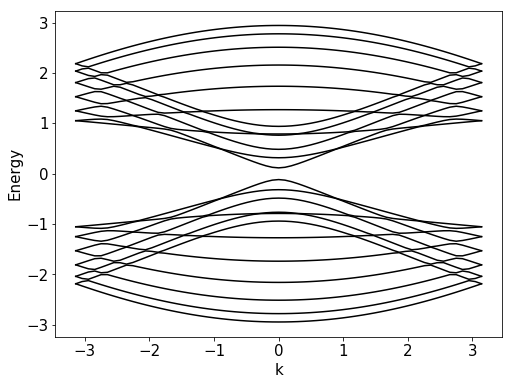


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:37,576                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11832f950>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

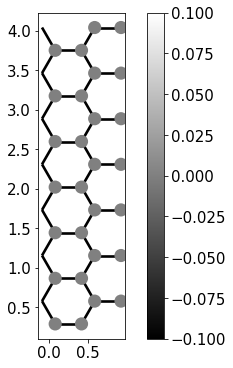

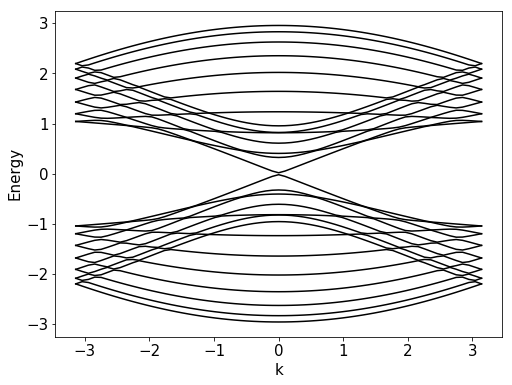


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:37,965                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11832f378>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

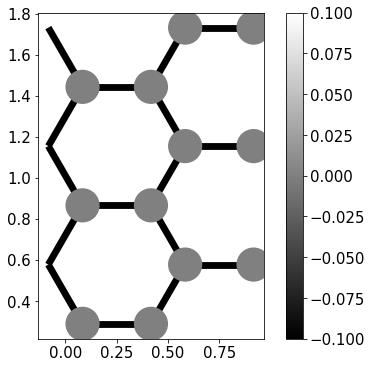

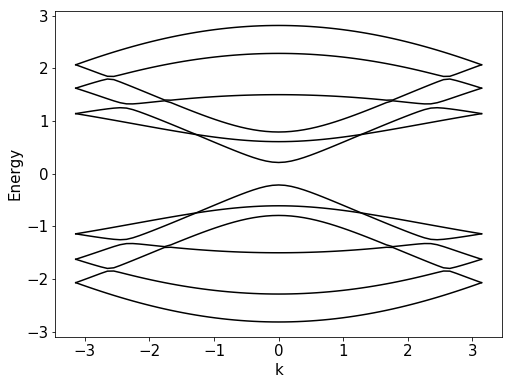


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:38,310                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11832f950>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

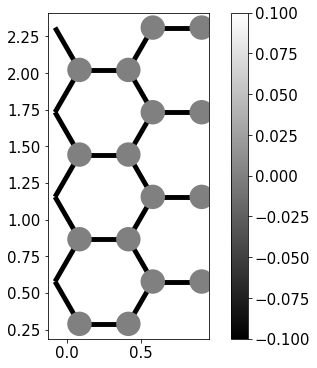

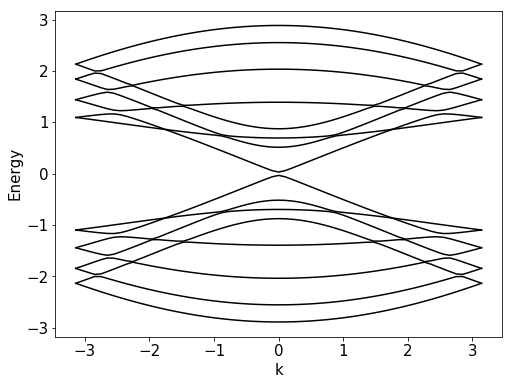


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:38,696                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11c827b70>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

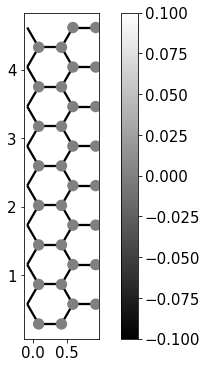

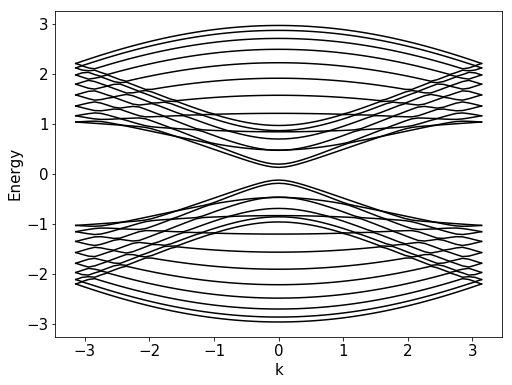


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:39,079                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11d77db70>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

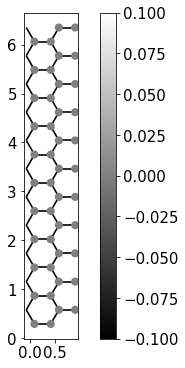

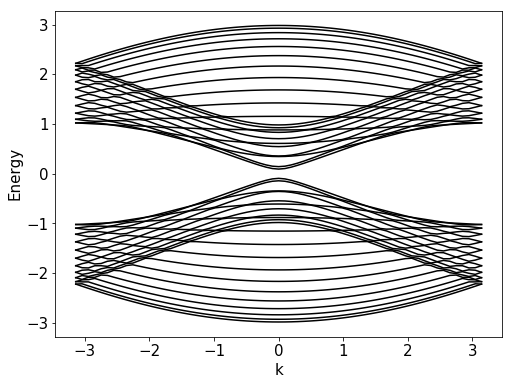


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:39,714                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x12176c8c8>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

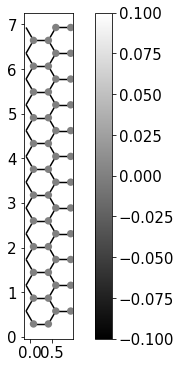

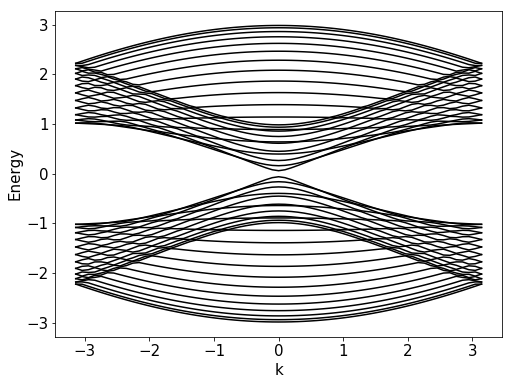


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:40,240                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x117bd1e18>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

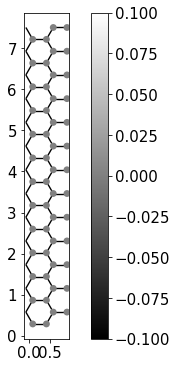

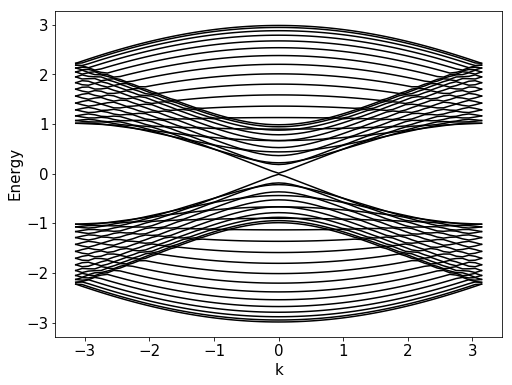


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:40,786                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11832fd90>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

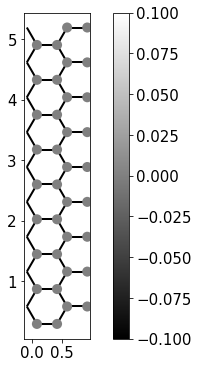

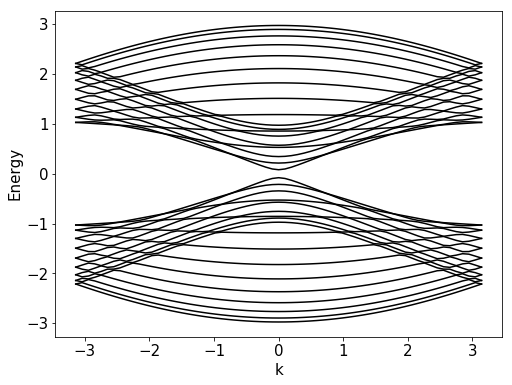


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:41,257                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11c75fd08>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

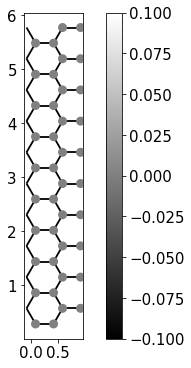

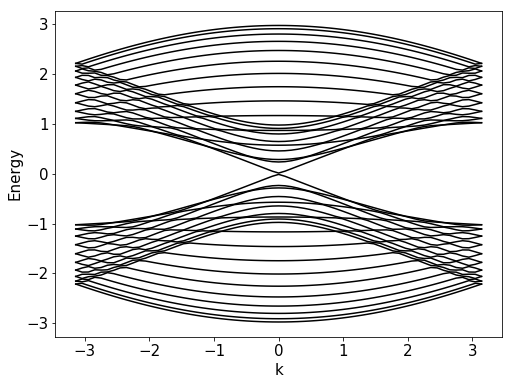


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-11 14:15:41,717                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x1291d8378>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

In [124]:
N_list =[4,10,12,14,6,8,16,22,24,26,18,20]
pol_N={}
import z2pack
from Z2_compute import zak_bands as zak_bands_z2
for N in N_list:
    # Making a Zigzag lead
    beard_1d = make_1D_bearded(N=N) 
    #beard_1d[Bearded.neighbors(2)] = 0.001
    beard_1d = terminate_edges(beard_1d,Bearded,get_width(N))
    kwant.plot(beard_1d,site_color=family_color);
    beard_1d = beard_1d.finalized()
    kwant.plotter.bands(beard_1d);

    act_pos = np.array([beard_1d.pos(i) for i in range(2*N)])
    a1,a2 = [Bearded.prim_vecs[0][0],get_width(N=N)]
    red_pos = np.zeros(np.shape(act_pos))
    red_pos[:,0] = act_pos[:,0]/a1
    red_pos[:,1] = act_pos[:,1]/a2


    ham_k=zak_bands_z2(beard_1d,momenta=1001,dim=1)
    z2_system = z2pack.hm.System(ham_k,dim=1,#pos=red_pos,
                                 convention=2)
    pol_sum = 0
    for n in range(0,1):
        result1 = z2pack.line.run(system=z2_system, 
                                 line=lambda t1: [t1])#,n/(N+1)])#,
                                 #pos_tol=1e-3,iterator=range(200,500,2));
    #np.exp(-1*2*np.pi*np.sum(np.log(np.diagonal(result.wilson))))
    #result.pol
        #result12 = z2pack.line.run(system=z2_system, 
        #                         line=lambda t1: [t1,-n/(N+1)],
        #                         pos_tol=1e-2)
        pol_sum += result1.pol
        #pol_sum += result2.pol
        
    
    #pol_N[N] = np.sign(np.exp(-1j*2*np.pi*(pol_sum % 1)))
    pol_N[N] = pol_sum % 1

In [125]:
pol_N

{4: 0.5,
 10: 0.4999999999999982,
 12: 0.9999999999999947,
 14: 7.105427357601002e-15,
 6: 0.9999999999999973,
 8: 0.9999999999999969,
 16: 0.49999999999999734,
 22: 0.4999999999999982,
 24: 0.0,
 26: 0.9999999999999929,
 18: 3.552713678800501e-15,
 20: 0.9999999999999982}